In [1]:
from Bio.PDB import *

# parser = PDBParser()
parser = MMCIFParser()
# structure = parser.get_structure("", "data/2kdk.pdb")
structure = parser.get_structure("", "data/clock_bmal1_modelled.cif")
models = structure.get_models()
protein = {}
for model in models:
    print("model")
    chains = model.get_chains()
    for chain in chains:
        chain_residues = []
        # print(chain.id)
        atoms = chain.get_atoms()
        # count = 0
        atoms_list = []
        for atom in atoms:
            if atom.name=="CA":
                atoms_list.append(atom)
                # count += 1
                ca_atom = atom
                ca_coord = atom.get_coord()
                # print(ca_atom, ca_coord)
                residue = atom.get_parent()
                # print(residue.get_resname())
                # if count==2:
                    # break
                chain_residues.append(atom)
        protein[chain.id] = chain_residues
        # print(atoms_list)
        # print(atoms_list[0]-atoms_list[1])
        # print(atoms_list[1]-atoms_list[0])

for chain in protein:
    print(len(protein[chain]))
    print(chain)
residueNames = []
for atom in protein["A"]:
    residue = atom.get_parent()
    residueNames.append(residue.get_resname())
for atom in protein["B"]:
    residue = atom.get_parent()
    residueNames.append(residue.get_resname())
print(len(residueNames))

model
354
A
374
B
728


In [2]:
distanceThreshold = 7.0
chainAEdges = []
chainA = protein['A']
for i in range(len(chainA)-1):
    for j in range(i+1, len(chainA)):
        distance = chainA[i]-chainA[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i, j, distance)
            chainAEdges.append((i,j))
print("No. of edges in chain A graph:",len(chainAEdges))

nodeIdGap = len(protein['A'])
chainBEdges = []
chainB = protein['B']
for i in range(len(chainB)-1):
    for j in range(i+1, len(chainB)):
        distance = chainB[i]-chainB[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i+nodeIdGap, j+nodeIdGap, distance)
            chainBEdges.append((i+nodeIdGap, j+nodeIdGap))
print("No. of edges in chain B graph:",len(chainBEdges))

chainAB = []
chainAB.extend(protein['A'])
chainAB.extend(protein['B'])
chainABEdges = []
for i in range(len(chainAB)-1):
    for j in range(i+1, len(chainAB)):
        distance = chainAB[i]-chainAB[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i, j, distance)
            chainABEdges.append((i,j))
print("No. of edges in chain AB graph:",len(chainABEdges))


No. of edges in chain A graph: 1257
No. of edges in chain B graph: 1301
No. of edges in chain AB graph: 2638


354
374
728
No. of chain A degree changes: 50
[[(19, 8), (19, 9)], [(22, 8), (22, 9)], [(26, 8), (26, 9)], [(40, 6), (40, 7)], [(43, 8), (43, 9)], [(47, 8), (47, 9)], [(50, 8), (50, 9)], [(51, 8), (51, 9)], [(62, 5), (62, 6)], [(64, 5), (64, 7)], [(65, 5), (65, 7)], [(67, 6), (67, 7)], [(68, 4), (68, 6)], [(69, 4), (69, 6)], [(73, 4), (73, 6)], [(77, 6), (77, 7)], [(78, 8), (78, 10)], [(80, 8), (80, 9)], [(82, 8), (82, 10)], [(86, 6), (86, 8)], [(87, 7), (87, 9)], [(102, 6), (102, 7)], [(104, 7), (104, 8)], [(153, 9), (153, 10)], [(177, 4), (177, 5)], [(178, 5), (178, 8)], [(179, 8), (179, 11)], [(180, 7), (180, 9)], [(181, 8), (181, 9)], [(185, 9), (185, 11)], [(186, 10), (186, 11)], [(222, 11), (222, 12)], [(223, 10), (223, 13)], [(227, 7), (227, 9)], [(228, 4), (228, 5)], [(231, 4), (231, 5)], [(251, 4), (251, 5)], [(252, 4), (252, 6)], [(263, 9), (263, 11)], [(264, 6), (264, 9)], [(265, 6), (265, 8)], [(266, 8), (266, 10)], [(267, 9), (267, 11)], [(269, 6), (269, 7)], [(291, 8), (2

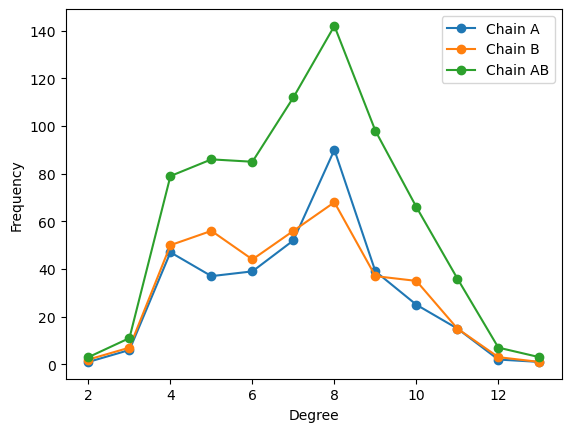

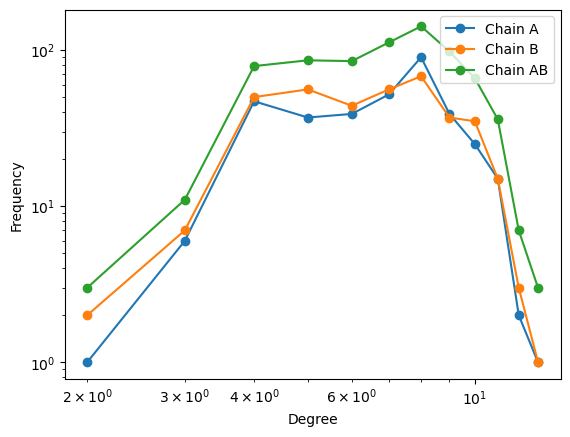

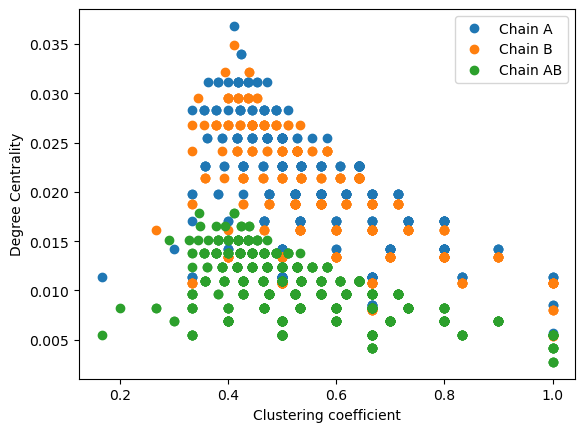

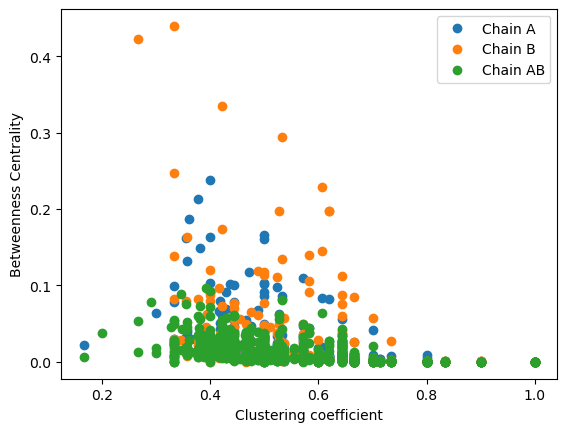

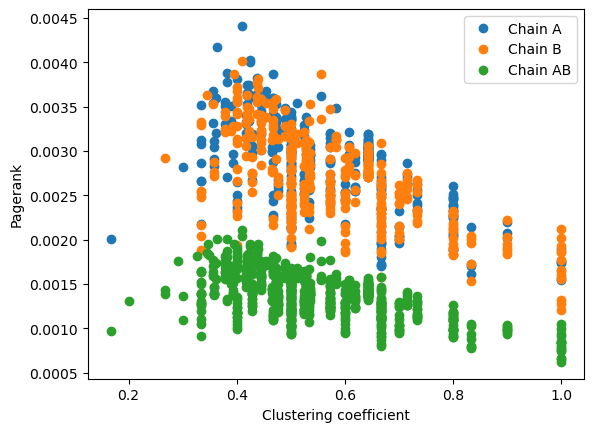

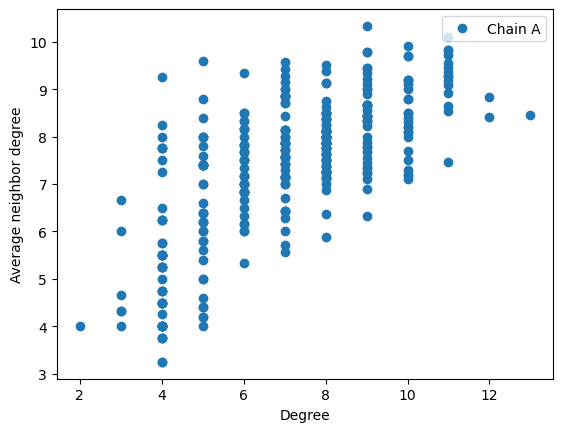

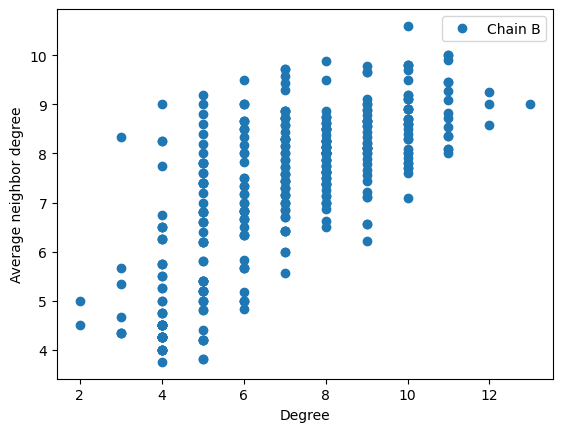

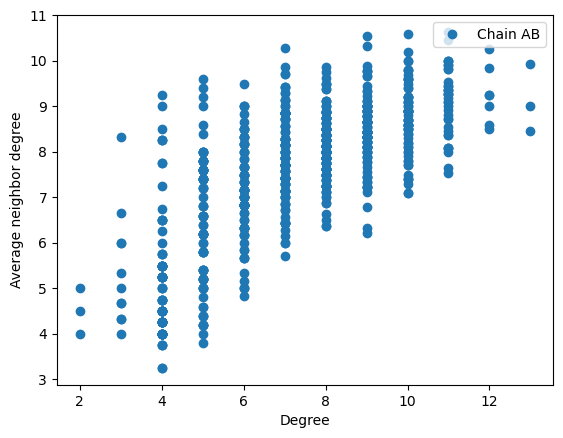

In [3]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

g1 = nx.Graph(chainAEdges)
g2 = nx.Graph(chainBEdges)
g3 = nx.Graph(chainABEdges)

deg = [degree for node, degree in nx.degree(g1)]
print(len(deg))
degVals1 = np.unique(deg)
degCounts1 = [deg.count(x) for x in degVals1]
deg = [degree for node, degree in nx.degree(g2)]
print(len(deg))
degVals2 = np.unique(deg)
degCounts2 = [deg.count(x) for x in degVals2]
deg = [degree for node, degree in nx.degree(g3)]
print(len(deg))
degVals3 = np.unique(deg)
degCounts3 = [deg.count(x) for x in degVals3]
plt.plot(degVals1, degCounts1, 'o-', label="Chain A")
plt.plot(degVals2, degCounts2, 'o-', label="Chain B")
plt.plot(degVals3, degCounts3, 'o-', label="Chain AB")
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.figure()
plt.loglog(degVals1, degCounts1, 'o-', label="Chain A")
plt.loglog(degVals2, degCounts2, 'o-', label="Chain B")
plt.loglog(degVals3, degCounts3, 'o-', label="Chain AB")
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.figure()

nodeDeg1 = [(node, degree) for node, degree in nx.degree(g1)]
nodeDeg1 = sorted(nodeDeg1, key=lambda x: x[0])
nodeDeg2 = [(node, degree) for node, degree in nx.degree(g2)]
nodeDeg2 = sorted(nodeDeg2, key=lambda x: x[0])
nodeDeg3 = [(node, degree) for node, degree in nx.degree(g3)]
nodeDeg3 = sorted(nodeDeg3, key=lambda x: x[0])
chainAChanges = []
for i in range(len(nodeDeg1)):
    if nodeDeg1[i][1]!=nodeDeg3[i][1]:
        chainAChanges.append([nodeDeg1[i], nodeDeg3[i]])
print("No. of chain A degree changes:", len(chainAChanges))
print(chainAChanges)
chainBChanges = []
# print(nodeDeg2)
for i in range(len(nodeDeg2)):
    # print(nodeDeg2[i])
    # print(nodeDeg3[nodeDeg2[i][0]])
    if nodeDeg2[i][1]!=nodeDeg3[nodeDeg2[i][0]][1]:
        chainBChanges.append([nodeDeg2[i], nodeDeg3[nodeDeg2[i][0]]])
print("No. of chain B degree changes:", len(chainBChanges))
print(chainBChanges)

clusCoeff1 = nx.clustering(g1)
degCen1 = nx.degree_centrality(g1)
nodes = clusCoeff1.keys()
x, y = [], []
for node in nodes:
    x.append(clusCoeff1[node])
    y.append(degCen1[node])
plt.plot(x, y, 'o', label="Chain A")
clusCoeff2 = nx.clustering(g2)
degCen2 = nx.degree_centrality(g2)
nodes = clusCoeff2.keys()
x, y = [], []
for node in nodes:
    x.append(clusCoeff2[node])
    y.append(degCen2[node])
plt.plot(x, y, 'o', label="Chain B")
clusCoeff3 = nx.clustering(g3)
degCen3 = nx.degree_centrality(g3)
nodes = clusCoeff3.keys()
x, y = [], []
for node in nodes:
    x.append(clusCoeff3[node])
    y.append(degCen3[node])
plt.plot(x, y, 'o', label="Chain AB")
plt.xlabel('Clustering coefficient')
plt.ylabel('Degree Centrality')
plt.legend(loc='upper right')
plt.figure()

degCen1 = nx.betweenness_centrality(g1)
nodes = clusCoeff1.keys()
x, y = [], []
for node in nodes:
    x.append(clusCoeff1[node])
    y.append(degCen1[node])
plt.plot(x, y, 'o', label="Chain A")
degCen2 = nx.betweenness_centrality(g2)
nodes = clusCoeff2.keys()
x, y = [], []
for node in nodes:
    x.append(clusCoeff2[node])
    y.append(degCen2[node])
plt.plot(x, y, 'o', label="Chain B")
degCen3 = nx.betweenness_centrality(g3)
nodes = clusCoeff3.keys()
x, y = [], []
for node in nodes:
    x.append(clusCoeff3[node])
    y.append(degCen3[node])
plt.plot(x, y, 'o', label="Chain AB")
plt.xlabel('Clustering coefficient')
plt.ylabel('Betweenness Centrality')
plt.legend(loc='upper right')
plt.figure()

degCen1 = nx.pagerank(g1)
nodes = clusCoeff1.keys()
x, y = [], []
for node in nodes:
    x.append(clusCoeff1[node])
    y.append(degCen1[node])
plt.plot(x, y, 'o', label="Chain A")
degCen2 = nx.pagerank(g2)
nodes = clusCoeff2.keys()
x, y = [], []
for node in nodes:
    x.append(clusCoeff2[node])
    y.append(degCen2[node])
plt.plot(x, y, 'o', label="Chain B")
degCen3 = nx.pagerank(g3)
nodes = clusCoeff3.keys()
x, y = [], []
for node in nodes:
    x.append(clusCoeff3[node])
    y.append(degCen3[node])
plt.plot(x, y, 'o', label="Chain AB")
plt.xlabel('Clustering coefficient')
plt.ylabel('Pagerank')
plt.legend(loc='upper right')
plt.figure()

nodeDeg1 = [(node, degree) for node, degree in nx.degree(g1)]
avgND1 = nx.average_neighbor_degree(g1)
x, y  = [], []
for nodeDeg in nodeDeg1:
    x.append(nodeDeg[1])
    y.append(avgND1[nodeDeg[0]])
plt.plot(x, y, 'o', label="Chain A")
plt.xlabel('Degree')
plt.ylabel('Average neighbor degree')
plt.legend(loc='upper right')
plt.figure()
nodeDeg2 = [(node, degree) for node, degree in nx.degree(g2)]
avgND2 = nx.average_neighbor_degree(g2)
x, y  = [], []
for nodeDeg in nodeDeg2:
    x.append(nodeDeg[1])
    y.append(avgND2[nodeDeg[0]])
plt.plot(x, y, 'o', label="Chain B")
plt.xlabel('Degree')
plt.ylabel('Average neighbor degree')
plt.legend(loc='upper right')
plt.figure()
nodeDeg3 = [(node, degree) for node, degree in nx.degree(g3)]
avgND3 = nx.average_neighbor_degree(g3)
x, y  = [], []
for nodeDeg in nodeDeg3:
    x.append(nodeDeg[1])
    y.append(avgND3[nodeDeg[0]])
plt.plot(x, y, 'o', label="Chain AB")
plt.xlabel('Degree')
plt.ylabel('Average neighbor degree')
plt.legend(loc='upper right')


local_centrality
finding global centrality 
0.0001699802973803857 0.0019501038818195604
0.00045684382066517516 0.0027955154254153273
728
728
152


<Figure size 640x480 with 0 Axes>

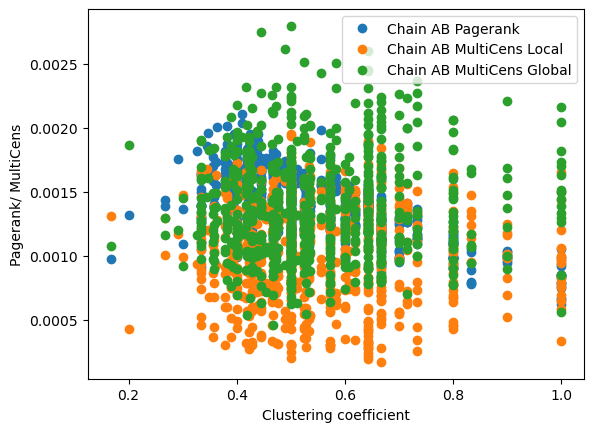

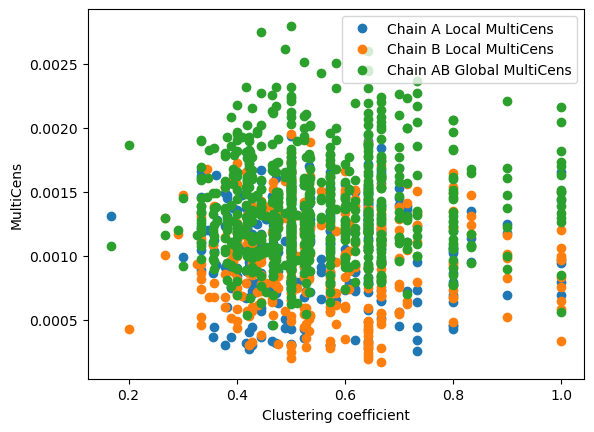

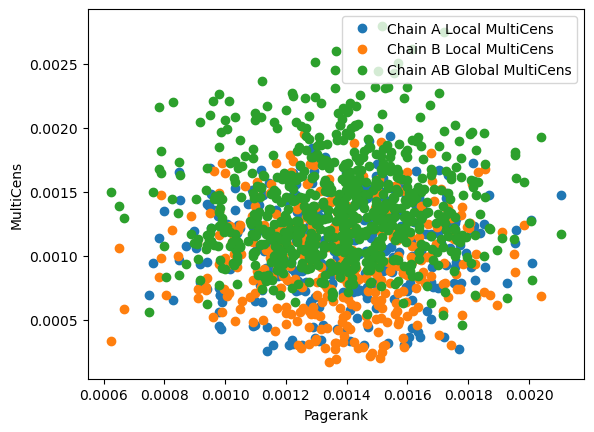

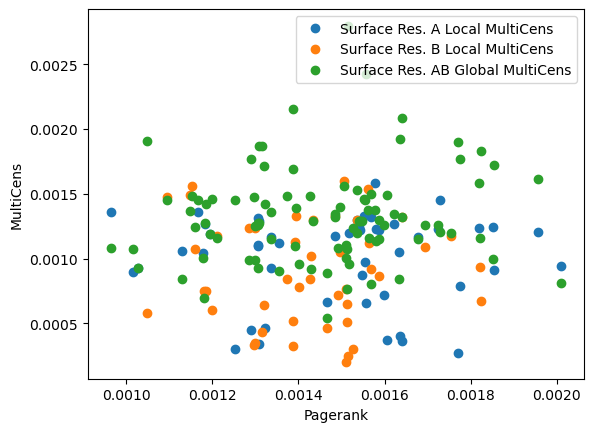

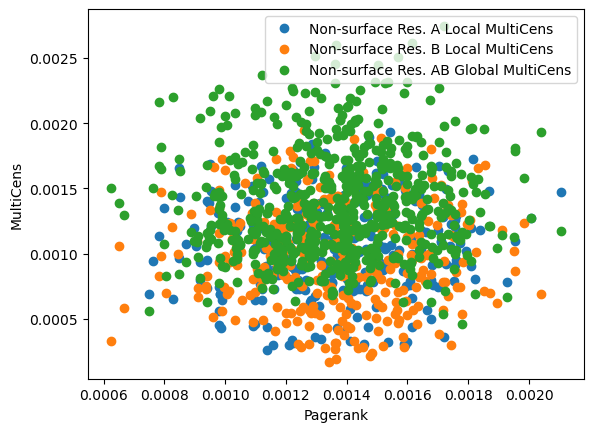

<Figure size 640x480 with 0 Axes>

In [8]:
import copy

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
    
def local_centrality(A_tilde_full, num_layers, p):
    print("local_centrality")
    A_tilde_full = A_tilde_full/np.sum(A_tilde_full, axis=0)
    #A_tilde_full = A_tilde_full/LA.norm(A_tilde_full)
    n = int(np.shape(A_tilde_full)[0]/num_layers)
    N = int(np.shape(A_tilde_full)[0])
    A_tilde = np.zeros_like(A_tilde_full, dtype=np.float32)
    
    for i in range(num_layers):
        # print(i,n)
        # print(len(A_tilde_full), len(A_tilde_full[0]))
        # print(A_tilde_full[0:364,0:364])
        A_tilde[(i*n):((i+1)*n),(i*n):((i+1)*n)] = A_tilde_full[(i*n):((i+1)*n),(i*n):((i+1)*n)]
        
    ones_t = np.ones((N,))/N
    l = np.copy(ones_t)
    l_new = np.copy(ones_t)
    
    count = 0
    current_angle = np.zeros(3,)
    # print("local centrality computation starts")
    while(count<200):
        # print(count)
        count = count + 1
        l_new = (p* ((A_tilde).dot(l))) + (1-p)*ones_t
        current_angle[0] = current_angle[1]
        current_angle[1] = current_angle[2]
        current_angle[2] = angle_between(l, l_new)
        # print(current_angle)
        if(((current_angle[1] == current_angle[2])) or (current_angle[2] == 0)):
            break
        l = copy.deepcopy(l_new)
        #l = copy.deepcopy(l_new)/LA.norm(l_new)
    # print("l values")
    # print(l)
    #new_l = l/l.sum()# + l_tt/l_tt.sum()
    new_l = copy.deepcopy(l)
    
    for i in range(num_layers):
        l[(i*n):((i+1)*n)] = l[(i*n):((i+1)*n)]/l[(i*n):((i+1)*n)].sum()
    return new_l

def global_centrality(A_tilde_full, num_layers, p):
    l = local_centrality(A_tilde_full, num_layers, p) #last checkpoint
    #A_tilde = copy.deepcopy(A_tilde_full)
    A_tilde = A_tilde_full/np.sum(A_tilde_full, axis=0)
    N = int(np.shape(A_tilde)[0])
    n = int(N/num_layers)
    # print("A_tilde sums")
    # print(np.sum(A_tilde[0,:]))
    # print(np.sum(A_tilde[:,0]))
        
    A = np.zeros_like(A_tilde_full, dtype=np.float32)
    C = np.zeros_like(A_tilde_full, dtype=np.float32)
    A[:n,:n] = copy.deepcopy(A_tilde[:n,:n])
    A[n:(2*n),n:(2*n)] = copy.deepcopy(A_tilde[n:(2*n),n:(2*n)])
    A[(2*n):(3*n),(2*n):(3*n)] = copy.deepcopy(A_tilde[(2*n):(3*n),(2*n):(3*n)])
    A[(3*n):(4*n),(3*n):(4*n)] = copy.deepcopy(A_tilde[(3*n):(4*n),(3*n):(4*n)])
    C = A_tilde - A
    
    
    print("finding global centrality ")
    
    ones_t = np.ones((N,))/N
    g = copy.deepcopy(ones_t)
    g_new = copy.deepcopy(ones_t)
    
    
    counter = 0
    current_angle = np.zeros(3,)
    
    while(counter<150):
        g_new = (p * ((A+C).dot(g) + (C.dot(l)) )) + ((1-p)*ones_t)

        current_angle[0] = current_angle[1]
        current_angle[1] = current_angle[2]
        current_angle[2] = angle_between(g, g_new)
        # print(current_angle)
        if(((current_angle[1] == current_angle[2])) or (current_angle[2] == 0)):
            break
        g = copy.deepcopy(g_new)
        #g = copy.deepcopy(g_new)/LA.norm(g_new)
        counter+=1
        # print(counter)
        # print(np.sum(g))
    
    new_g = copy.deepcopy(g)
    g_fresh = copy.deepcopy(g)
    new_g = new_g/new_g.sum()
    g_fresh = g_fresh/g_fresh.sum()
    return l, new_g

adjMatG3 = nx.to_pandas_adjacency(g3)
# print(adjMatG3.to_numpy())
l, g = global_centrality(adjMatG3.to_numpy(), 2, 0.9)
print(min(l),max(l))
print(min(g),max(g))
# print(l)
print(len(g))
print(len(l))

degCen3 = nx.pagerank(g3)
clusCoeff3 = nx.clustering(g3)
nodes = clusCoeff3.keys()
x, y = [], []
for node in nodes:
    x.append(clusCoeff3[node])
    y.append(degCen3[node])
plt.plot(x, y, 'o', label="Chain AB Pagerank")
# plt.figure()
x, y = [], []
for i in range(len(l)):
    x.append(clusCoeff3[i])
    y.append(l[i])
plt.plot(x, y, 'o', label="Chain AB MultiCens Local")
x, y = [], []
for i in range(len(g)):
    x.append(clusCoeff3[i])
    y.append(g[i])
plt.plot(x, y, 'o', label="Chain AB MultiCens Global")
plt.xlabel('Clustering coefficient')
plt.ylabel('Pagerank/ MultiCens')
plt.legend(loc='upper right')
plt.figure()

x, y = [], []
for i in range(354):
    x.append(clusCoeff3[i])
    y.append(l[i])
plt.plot(x, y, 'o', label="Chain A Local MultiCens")
x, y = [], []
for i in range(354, len(l)):
    x.append(clusCoeff3[i])
    y.append(l[i])
plt.plot(x, y, 'o', label="Chain B Local MultiCens")
x, y = [], []
for i in range(len(g)):
    x.append(clusCoeff3[i])
    y.append(g[i])
plt.plot(x, y, 'o', label="Chain AB Global MultiCens")
plt.xlabel('Clustering coefficient')
plt.ylabel('MultiCens')
plt.legend(loc='upper right')
plt.figure()

degCen3 = nx.pagerank(g3)
x, y = [], []
for i in range(354):
    x.append(degCen3[i])
    y.append(l[i])
plt.plot(x, y, 'o', label="Chain A Local MultiCens")
x, y = [], []
for i in range(354, len(l)):
    x.append(degCen3[i])
    y.append(l[i])
plt.plot(x, y, 'o', label="Chain B Local MultiCens")
x, y = [], []
for i in range(len(g)):
    x.append(degCen3[i])
    y.append(g[i])
plt.plot(x, y, 'o', label="Chain AB Global MultiCens")
plt.xlabel('Pagerank')
plt.ylabel('MultiCens')
plt.legend(loc='upper right')
plt.figure()

surfaceResidues = []
for e in g3.edges:
    if e[0]<354 and e[1]>=354:
        surfaceResidues.append(e[0])
        surfaceResidues.append(e[1])
print(len(surfaceResidues))

degCen3 = nx.pagerank(g3)
x, y = [], []
for i in range(354):
    if i in surfaceResidues:
        x.append(degCen3[i])
        y.append(l[i])
plt.plot(x, y, 'o', label="Surface Res. A Local MultiCens")
x, y = [], []
for i in range(354, len(l)):
    if i in surfaceResidues:
        x.append(degCen3[i])
        y.append(l[i])
plt.plot(x, y, 'o', label="Surface Res. B Local MultiCens")
x, y = [], []
for i in range(len(g)):
    if i in surfaceResidues:
        x.append(degCen3[i])
        y.append(g[i])
plt.plot(x, y, 'o', label="Surface Res. AB Global MultiCens")
plt.xlabel('Pagerank')
plt.ylabel('MultiCens')
plt.legend(loc='upper right')
plt.figure()

degCen3 = nx.pagerank(g3)
x, y = [], []
for i in range(354):
    if i not in surfaceResidues:
        x.append(degCen3[i])
        y.append(l[i])
plt.plot(x, y, 'o', label="Non-surface Res. A Local MultiCens")
x, y = [], []
for i in range(354, len(l)):
    if i not in surfaceResidues:
        x.append(degCen3[i])
        y.append(l[i])
plt.plot(x, y, 'o', label="Non-surface Res. B Local MultiCens")
x, y = [], []
for i in range(len(g)):
    if i not in surfaceResidues:
        x.append(degCen3[i])
        y.append(g[i])
plt.plot(x, y, 'o', label="Non-surface Res. AB Global MultiCens")
plt.xlabel('Pagerank')
plt.ylabel('MultiCens')
plt.legend(loc='upper right')
plt.figure()


<Figure size 640x480 with 0 Axes>

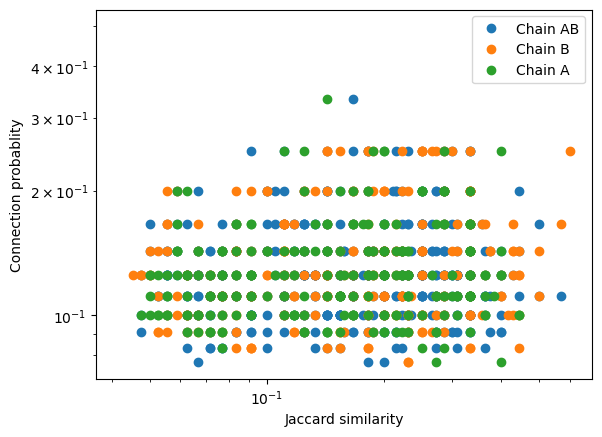

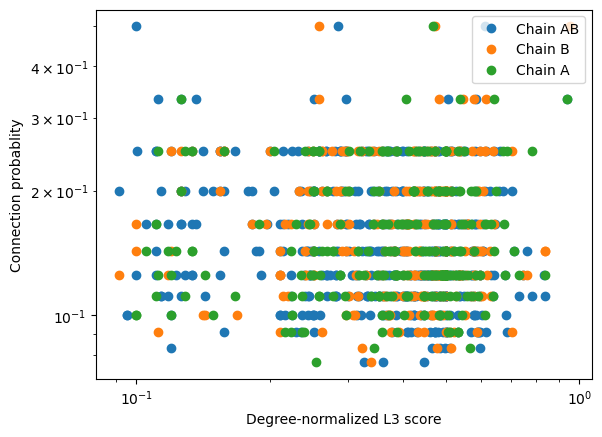

<Figure size 640x480 with 0 Axes>

In [30]:
adjMat3 = nx.adjacency_matrix(g3).todense()
# print(adjMat3)
probMat3 = adjMat3.copy().astype('float32')
for i in range(len(probMat3)):
    probMat3[i] = adjMat3[i] / sum(adjMat3[i])
adjMat2 = nx.adjacency_matrix(g2).todense()
probMat2 = adjMat2.copy().astype('float32')
for i in range(len(probMat2)):
    probMat2[i] = adjMat2[i] / sum(adjMat2[i])
adjMat1 = nx.adjacency_matrix(g1).todense()
probMat1 = adjMat1.copy().astype('float32')
for i in range(len(probMat1)):
    probMat1[i] = adjMat1[i] / sum(adjMat1[i])
# print(probMat3)
# print(len(probMat3))
# for edges in g3.edges():
#     if edges[0]==727 or edges[1]==727:
#         print(edges)
jacCoeff3 = nx.jaccard_coefficient(g3)
jacCoeff2 = nx.jaccard_coefficient(g2)
jacCoeff1 = nx.jaccard_coefficient(g1)

def getDegNormL3(g, r1, r2):
    degNormL3 = []
    for i in range(r1, r2):
        neighI = g.neighbors(i)
        for j in range(i+1, r2):
            neighJ = g.neighbors(j)
            pij = float(0)
            for u in neighI:
                uDegree = g.degree(u)
                for v in neighJ:
                    if g.has_edge(u, v):
                        vDegree = g.degree(v)
                        pij += 1.0/(uDegree*vDegree)**(1/2)
            degNormL3.append((i, j, pij))
    # print(degNormL3)
    return(degNormL3)

x, y = [], []
for u, v, j in jacCoeff3:
    x.append(j)
    y.append(probMat3[u][v])
plt.loglog(x, y, 'o', label="Chain AB")
x, y = [], []
for u, v, j in jacCoeff2:
    x.append(j)
    y.append(probMat2[u%354][v%354])
plt.loglog(x, y, 'o', label="Chain B")
x, y = [], []
for u, v, j in jacCoeff1:
    x.append(j)
    y.append(probMat1[u][v])
plt.loglog(x, y, 'o', label="Chain A")
plt.xlabel('Jaccard similarity')
plt.ylabel('Connection probablity')
plt.legend(loc='upper right')
plt.figure()

degNormL3 = getDegNormL3(g3, 0, 728)
x, y = [], []
for (u, v, l3) in degNormL3:
    x.append(l3)
    y.append(probMat3[u][v])
plt.loglog(x, y, 'o', label="Chain AB")
degNormL2 = getDegNormL3(g2, 354, 728)
x, y = [], []
for (u, v, l3) in degNormL2:
    x.append(l3)
    y.append(probMat2[u%354][v%354])
plt.loglog(x, y, 'o', label="Chain B")
degNormL1 = getDegNormL3(g1, 0, 354)
x, y = [], []
for (u, v, l3) in degNormL1:
    x.append(l3)
    y.append(probMat1[u][v])
plt.loglog(x, y, 'o', label="Chain A")
plt.xlabel('Degree-normalized L3 score')
plt.ylabel('Connection probablity')
plt.legend(loc='upper right')
plt.figure()


Text(0, 0.5, 'Overlap between pagerank and multicens')

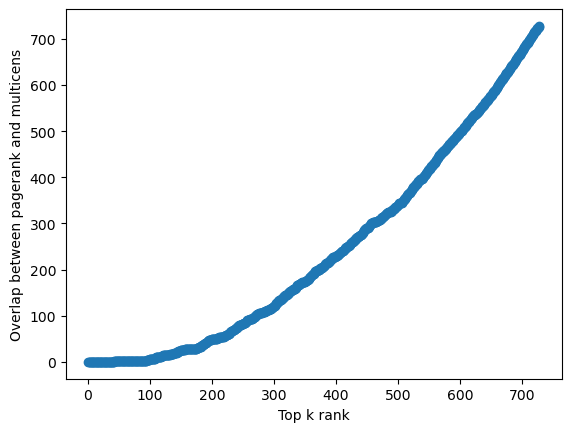

In [50]:
nx.k_shell(g3)

multicensRank, pagerankRank = [], []
for i in range(len(g)):
    multicensRank.append([i, g[i]])
    pagerankRank.append([i, degCen3[i]])
multicensRank.sort(key=lambda x:x[1], reverse=True)
pagerankRank.sort(key=lambda x:x[1], reverse=True)
# print(multicensRank[:100])
# print(pagerankRank[:100])

with open("ranking", 'w', newline='') as myfile:
    for i in range(len(multicensRank)):
        outStr = str(pagerankRank[i][0]) + ',' + \
                    str(pagerankRank[i][1]) + ',' +  \
                    str(multicensRank[i][0]) + ',' + \
                    str(multicensRank[i][1])
        myfile.write(outStr+'\n')
     
x, y = [], []
multicens, pagerank = [], []
for i in range(len(multicensRank)):
    multicens.append(multicensRank[i][0])
    pagerank.append(pagerankRank[i][0])
    x.append(i+1)
    y.append(len(set(multicens).intersection(set(pagerank))))
plt.plot(x, y, 'o')
plt.xlabel('Top k rank')
plt.ylabel('Overlap between pagerank and multicens')

Text(0, 0.5, 'Number of common nodes')

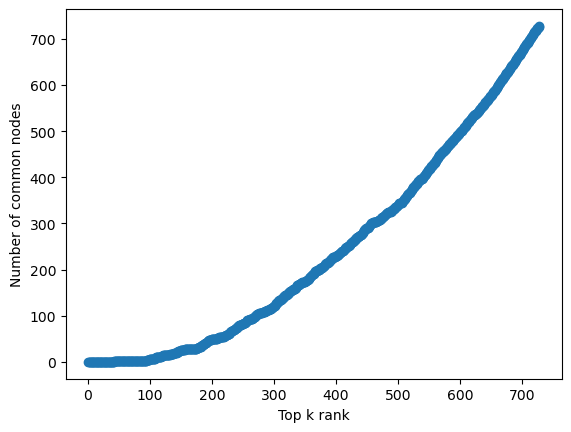

In [27]:
def localCentrality(A, p, maxIterations=1000):
    # A = A/np.sum(A, axis=0)
    n = A.shape[0]
    l = np.ones(n) / n
    unitNormal = np.copy(l)
    angle = float(0)
    for _ in range(maxIterations):
        lNew = (p*(A.dot(l))) + ((1-p)*unitNormal)
        angleNew = angle_between(l, lNew)
        if (angleNew==angle) or (angleNew==0):
            break
        l, angle = lNew, angleNew
    return(l)

def globalCentrality(A, C, p, maxIterations=1000):
    l = localCentrality(A, p)
    n = A.shape[0]
    g = np.ones(n) / n
    unitNormal = np.copy(g)
    angle = float(0)
    for _ in range(maxIterations):
        gNew = (p*((A+C).dot(g) + C.dot(l))) + ((1-p)*unitNormal)
        angleNew = angle_between(g, gNew)
        if (angleNew==angle) or (angleNew==0):
            break
        g, angle = gNew, angleNew
    return(g,l)

# A = [[0, 1, 1], [1, 0, 0], [1, 0, 0]]
# l = localCentrality(np.array(A), 0.9)
# print(l)
# l = local_centrality(np.array(A), 1, 0.9)
# print(l)

A, C = np.zeros(shape=(728, 728)), np.zeros(shape=(728, 728))
for (u, v) in chainAEdges+chainBEdges:
    A[u, v] = 1.
for (u, v) in chainABEdges:
    if (u<354 and v>=354) or (v<354 and u>=354):
        C[u, v] = 1.

def column_normalize(matrix):
    """Normalize the given matrix by its columns."""
    # Calculate the sum of each column
    column_sums = np.sum(matrix, axis=0)
    # Avoid division by zero by replacing zeros with ones
    column_sums[column_sums == 0] = 1
    # Normalize each column
    normalized_matrix = matrix / column_sums
    return normalized_matrix

ANorm = column_normalize(A)
CNorm = column_normalize(C)
g, l = globalCentrality(A, C, 0.9)
# print(g, l)

def normalize_scores(scores):
    """ Normalize the scores to the range [0, 1]. """
    min_score = np.min(scores)
    max_score = np.max(scores)
    return (scores - min_score) / (max_score - min_score) if max_score > min_score else scores
l = normalize_scores(l)
g = normalize_scores(g)

# intraG = nx.Graph(chainAEdges+chainBEdges)
graphAB = nx.Graph(chainABEdges)
pagerankAB = nx.pagerank(graphAB)

globalMultiCens, pageRank = [], []
for i in range(len(g)):
    globalMultiCens.append([i, g[i]])
    pageRank.append([i, pagerankAB[i]])
globalMultiCens.sort(key=lambda x:x[1], reverse=True)
pageRank.sort(key=lambda x:x[1], reverse=True)

x, y = [], []
rank1, rank2 = [], []
for i in range(len(globalMultiCens)):
    rank1.append(globalMultiCens[i][0])
    rank2.append(pageRank[i][0])
    x.append(i+1)
    y.append(len(set(rank1).intersection(set(rank2))))
plt.plot(x, y, 'o')
plt.xlabel('Top k rank')
plt.ylabel('Number of common nodes')


In [101]:
def computeJC(nu, nv):
    intersection = set(nu).intersection(set(nv))
    union = set(nu).union(set(nv))
    return(len(intersection)/len(union))
    
interEdges = []
for (u, v) in chainABEdges:
    if (u<354 and v>=354) or (v<354 and u>=354):
        interEdges.append([u,v])
# print(len(interEdges))
gAB = nx.Graph(chainABEdges)
for u, v in interEdges:
    nu = [x for x in gAB.neighbors(u)]
    nv = [x for x in gAB.neighbors(v)]
    jc = computeJC(nu, nv)
    print(u, v, jc)
    # break
jcAB = nx.jaccard_coefficient(gAB)
# for u, v, jc in jcAB:
    # if u==19:
        # print(u,v,jc)
    # print(u,v,jc)
    # break
# print(chainABEdg?es[0])
node, neighbor = 19, []
for u, v in chainABEdges:
    if u==node:
        neighbor.append(v)
    if v==node:
        neighbor.append(u)
print(neighbor)
print([x for x in gAB.neighbors(node)])


19 397 0.0
22 400 0.0
26 404 0.0
40 373 0.0
43 376 0.0
47 380 0.0
50 383 0.0625
51 383 0.0625
62 438 0.07142857142857142
64 437 0.14285714285714285
64 438 0.14285714285714285
65 434 0.06666666666666667
65 437 0.14285714285714285
67 459 0.07142857142857142
68 458 0.13333333333333333
68 459 0.16666666666666666
69 444 0.07692307692307693
69 458 0.13333333333333333
73 580 0.09090909090909091
73 581 0.09090909090909091
77 422 0.08333333333333333
78 523 0.07142857142857142
78 524 0.07142857142857142
80 422 0.07142857142857142
82 571 0.05263157894736842
82 601 0.047619047619047616
86 570 0.058823529411764705
86 602 0.05555555555555555
87 440 0.06666666666666667
87 441 0.07142857142857142
102 424 0.0
104 422 0.0
153 431 0.0
177 619 0.2222222222222222
178 619 0.4
178 620 0.25
178 621 0.25
179 619 0.3076923076923077
179 620 0.2857142857142857
179 621 0.2857142857142857
180 620 0.14285714285714285
180 621 0.14285714285714285
181 612 0.07142857142857142
185 438 0.05263157894736842
185 439 0.125
18

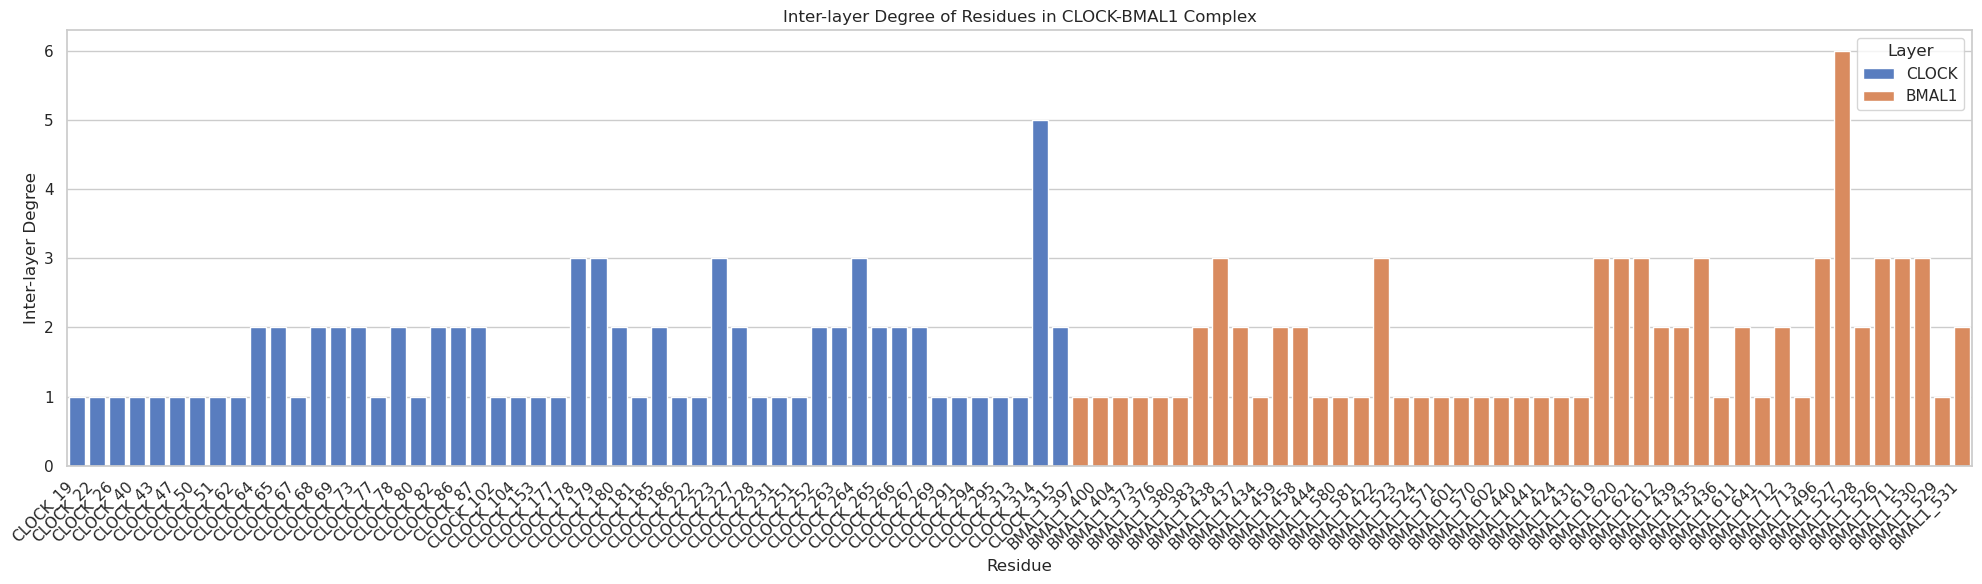

In [125]:
clock, bmal1 = {}, {}
for u, v in interEdges:
    clock[u] = 1 + clock.get(u, 0)
    bmal1[v] = 1 + bmal1.get(v, 0)
clockX, clockY = [], []
clockXY = []
for key, val in clock.items():
    clockX.append(key)
    clockY.append(val)
    clockXY.append((key, val))
bmal1X, bmal1Y = [], []
bmal1XY = []
for key, val in bmal1.items():
    bmal1X.append(key)
    bmal1Y.append(val)
    bmal1XY.append((key, val))
    
data = {
    'Residue': ['CLOCK_' + str(clockX[i]) for i in range(len(clockX))] +
               ['BMAL1_' + str(bmal1X[i]) for i in range(len(bmal1X))],
    'Inter-layer Degree': clockY + bmal1Y,
    'Layer': ['CLOCK'] * len(clockY) + ['BMAL1'] * len(bmal1Y)
}

import pandas as pd
df = pd.DataFrame(data)

sns.set(style='whitegrid')

# Create a bar plot for inter-layer degrees
plt.figure(figsize=(20, 6))
sns.barplot(x='Residue', y='Inter-layer Degree', hue='Layer', data=df, palette='muted')
plt.xticks(rotation=45, ha="right")
plt.title('Inter-layer Degree of Residues in CLOCK-BMAL1 Complex')
plt.xlabel('Residue')
plt.ylabel('Inter-layer Degree')
plt.legend(title='Layer')
plt.tight_layout()
plt.show()

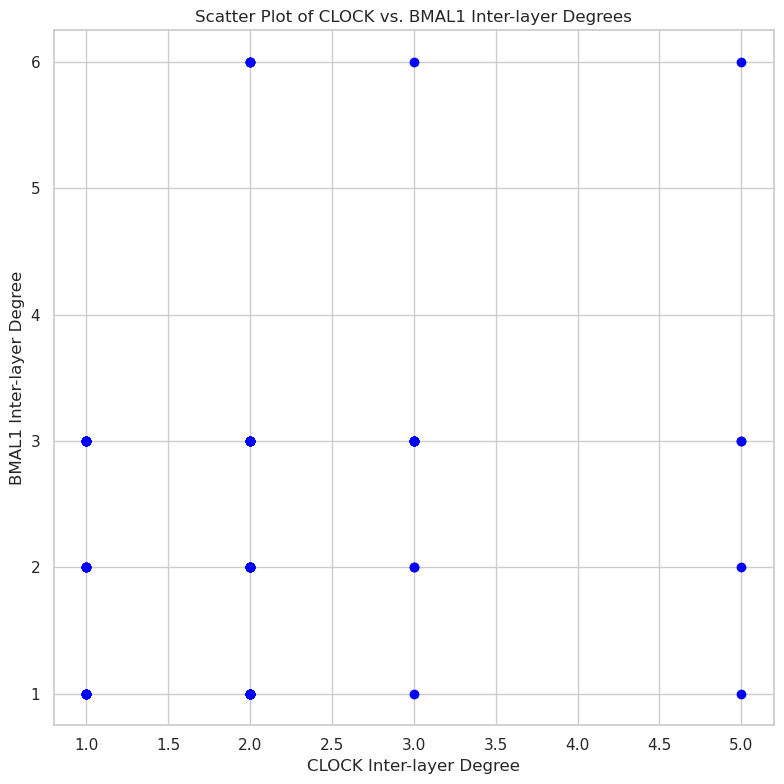

In [124]:
clockDeg, bmal1Deg = [], []
for u, v in interEdges:
    clockDeg.append(clock[u])
    bmal1Deg.append(bmal1[v])
    
plt.figure(figsize=(8, 8))
plt.scatter(clockDeg, bmal1Deg, color='blue')

plt.title('Scatter Plot of CLOCK vs. BMAL1 Inter-layer Degrees')
plt.xlabel('CLOCK Inter-layer Degree')
plt.ylabel('BMAL1 Inter-layer Degree')
plt.tight_layout()
plt.show()


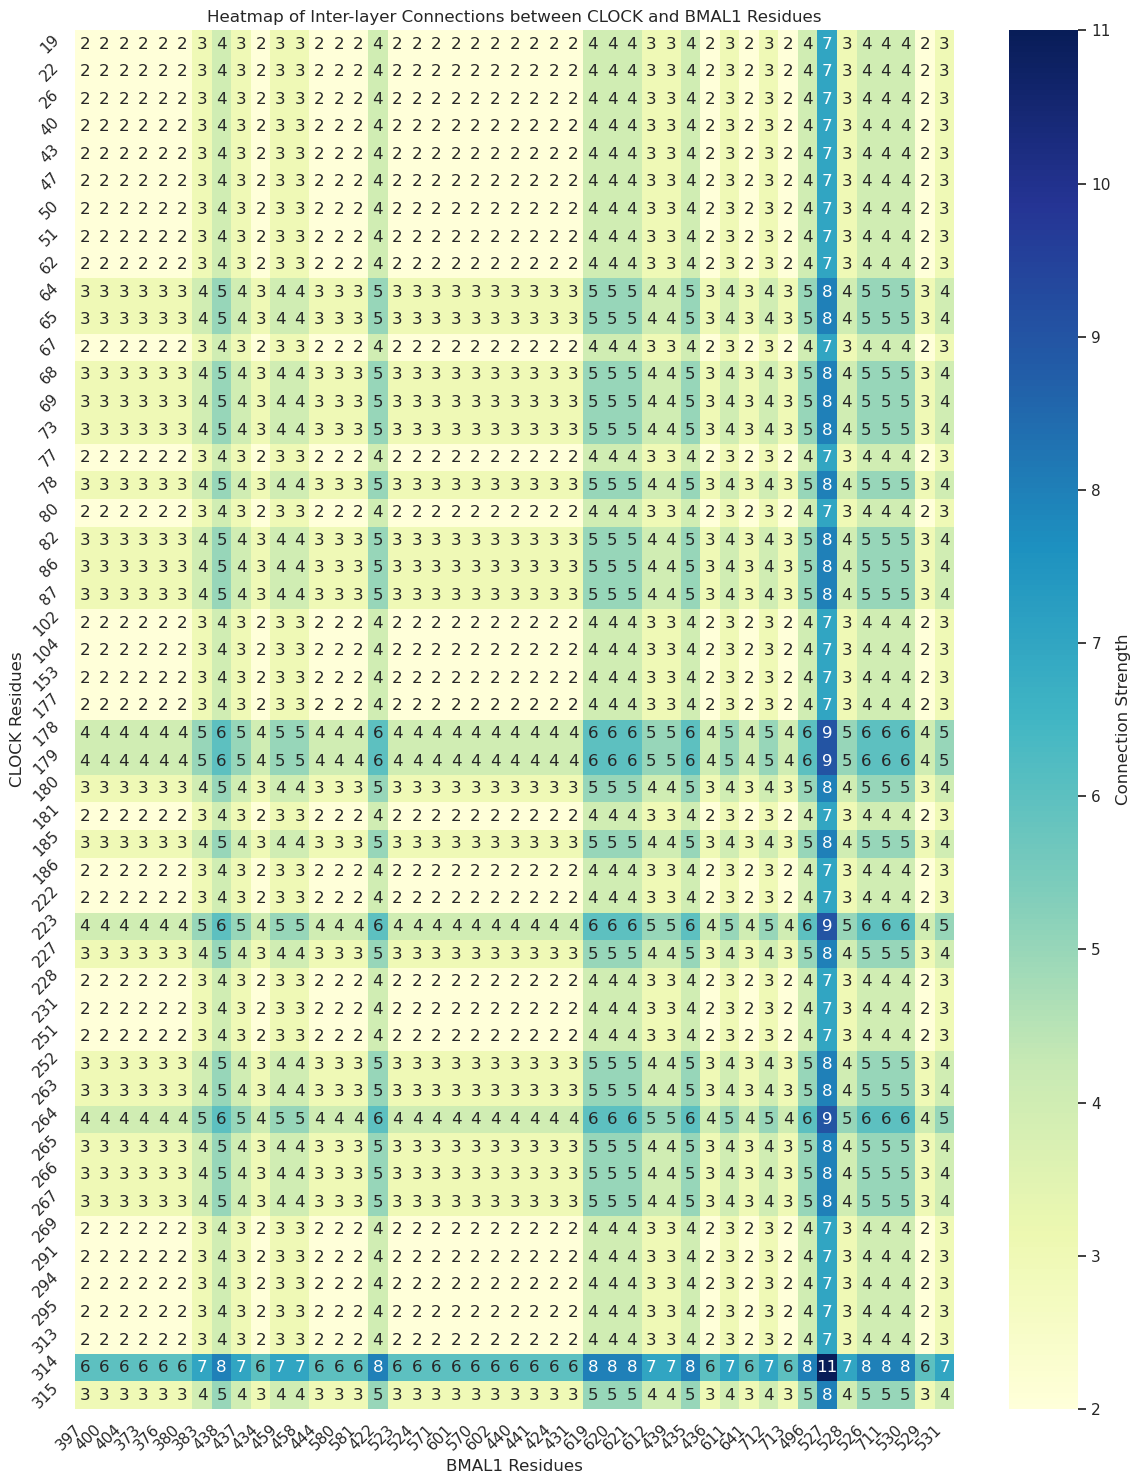

In [132]:
# Convert to DataFrames
clock_df = pd.DataFrame(clockXY, columns=['Residue', 'CLOCK Inter-layer Degree'])
bmal1_df = pd.DataFrame(bmal1XY, columns=['Residue', 'BMAL1 Inter-layer Degree'])

# Create an empty DataFrame for the interaction matrix
interaction_matrix = pd.DataFrame(0, index=clock_df['Residue'], columns=bmal1_df['Residue'])

# Fill the interaction matrix based on inter-layer connections
for clock_node in clock_df['Residue']:
    clock_degree = clock_df.loc[clock_df['Residue'] == clock_node, 'CLOCK Inter-layer Degree'].values[0]
    for bmal1_node in bmal1_df['Residue']:
        bmal1_degree = bmal1_df.loc[bmal1_df['Residue'] == bmal1_node, 'BMAL1 Inter-layer Degree'].values[0]
        
        # Fill the interaction matrix based on degrees
        if clock_degree > 0 and bmal1_degree > 0:
            interaction_matrix.loc[clock_node, bmal1_node] = clock_degree + bmal1_degree  # Or any other interaction metric

import seaborn as sns
import matplotlib.pyplot as plt

# Set the heatmap style
sns.set(style='whitegrid')

# Create the heatmap
plt.figure(figsize=(12, 15))  # Increase height
sns.heatmap(interaction_matrix, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Connection Strength'})
plt.title('Heatmap of Inter-layer Connections between CLOCK and BMAL1 Residues')
plt.xlabel('BMAL1 Residues')
plt.ylabel('CLOCK Residues')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

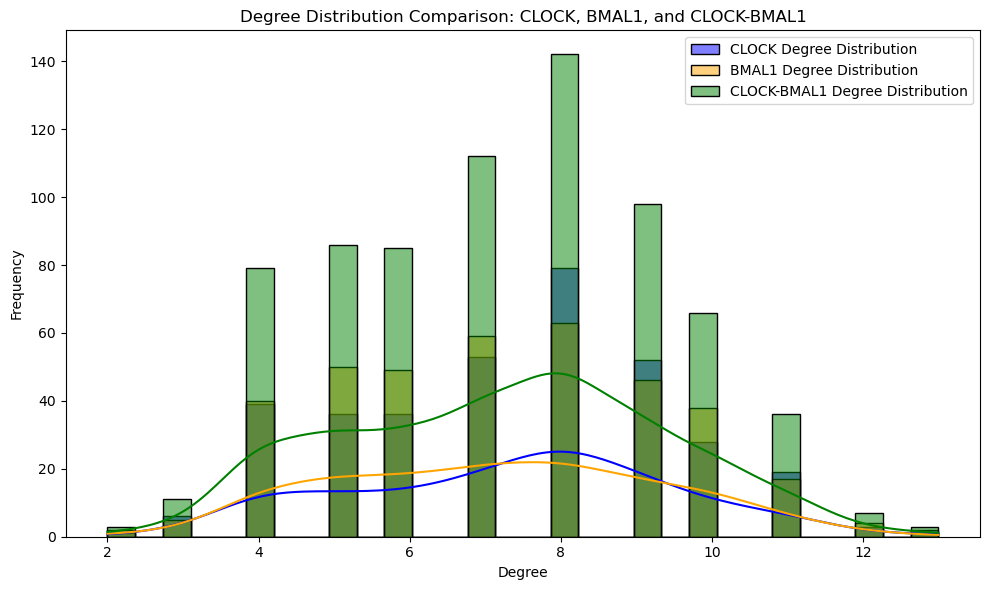

In [4]:
G = nx.Graph(chainABEdges)
allDegrees = dict(G.degree())
clockDegrees = {node: deg for node, deg in G.degree() if node<354}
bmal1Degrees = {node: deg for node, deg in G.degree() if node>=354}
clock_degree_values = list(clockDegrees.values())
bmal1_degree_values = list(bmal1Degrees.values())
total_degree_values = list(allDegrees.values())

# Plot the degree distributions using Seaborn histograms
plt.figure(figsize=(10, 6))

# Plot for CLOCK
sns.histplot(clock_degree_values, color='blue', label='CLOCK Degree Distribution', kde=True, bins=30)

# Plot for BMAL1
sns.histplot(bmal1_degree_values, color='orange', label='BMAL1 Degree Distribution', kde=True, bins=30)

# Plot for Total (CLOCK + BMAL1)
sns.histplot(total_degree_values, color='green', label='CLOCK-BMAL1 Degree Distribution', kde=True, bins=30)

# Customize the plot
plt.title('Degree Distribution Comparison: CLOCK, BMAL1, and CLOCK-BMAL1')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


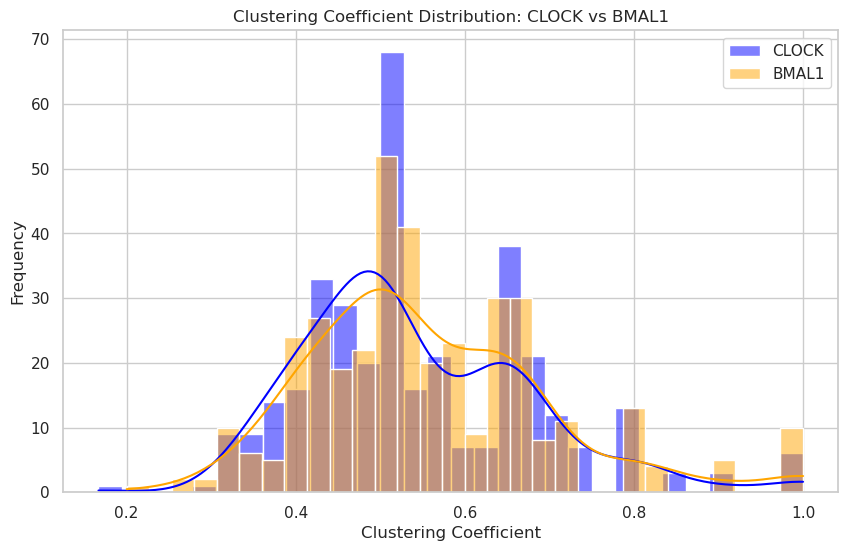

In [136]:
clustering_coeffs = nx.clustering(G)

# Separate CLOCK and BMAL1 residues
clock_clustering = {node: coeff for node, coeff in clustering_coeffs.items() if node<354}
bmal1_clustering = {node: coeff for node, coeff in clustering_coeffs.items() if node>=354}

# Plot clustering coefficient distribution with different colors
plt.figure(figsize=(10, 6))
sns.histplot(list(clock_clustering.values()), color='blue', label='CLOCK', kde=True, bins=30)
sns.histplot(list(bmal1_clustering.values()), color='orange', label='BMAL1', kde=True, bins=30)

plt.title('Clustering Coefficient Distribution: CLOCK vs BMAL1')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.show()

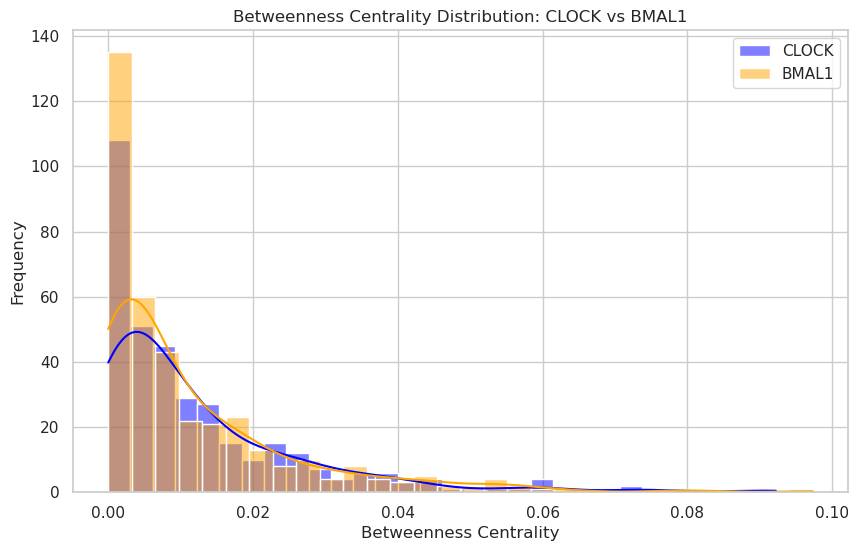

In [137]:
betweenness = nx.betweenness_centrality(G)

# Separate betweenness for CLOCK and BMAL1
clock_betweenness = {node: b for node, b in betweenness.items() if node<354}
bmal1_betweenness = {node: b for node, b in betweenness.items() if node>=354}

# Plot the betweenness centrality for CLOCK and BMAL1
plt.figure(figsize=(10, 6))
sns.histplot(list(clock_betweenness.values()), color='blue', label='CLOCK', kde=True, bins=30)
sns.histplot(list(bmal1_betweenness.values()), color='orange', label='BMAL1', kde=True, bins=30)

plt.title('Betweenness Centrality Distribution: CLOCK vs BMAL1')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.show()

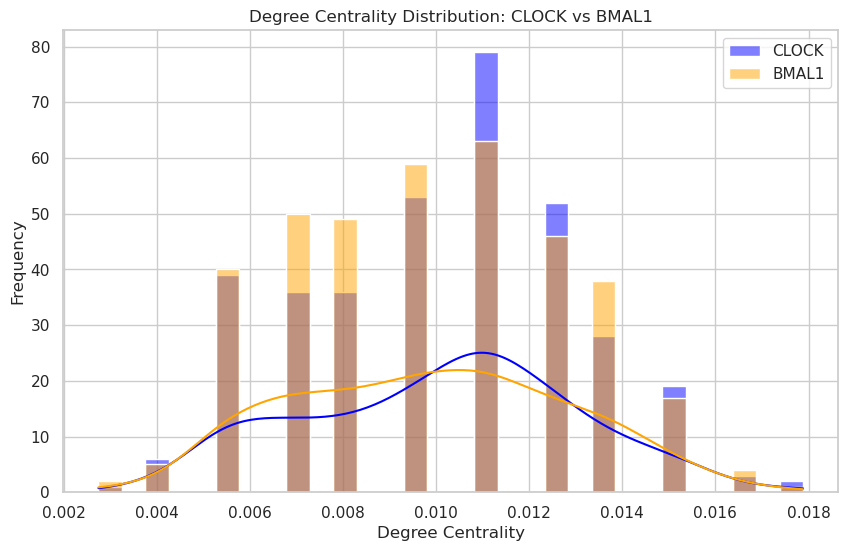

In [138]:
degree_centrality = nx.degree_centrality(G)

# Separate degree centrality for CLOCK and BMAL1
clock_degree_centrality = {node: dc for node, dc in degree_centrality.items() if node<354}
bmal1_degree_centrality = {node: dc for node, dc in degree_centrality.items() if node>=354}

# Plot the degree centrality for CLOCK and BMAL1
plt.figure(figsize=(10, 6))
sns.histplot(list(clock_degree_centrality.values()), color='blue', label='CLOCK', kde=True, bins=30)
sns.histplot(list(bmal1_degree_centrality.values()), color='orange', label='BMAL1', kde=True, bins=30)

plt.title('Degree Centrality Distribution: CLOCK vs BMAL1')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.show()


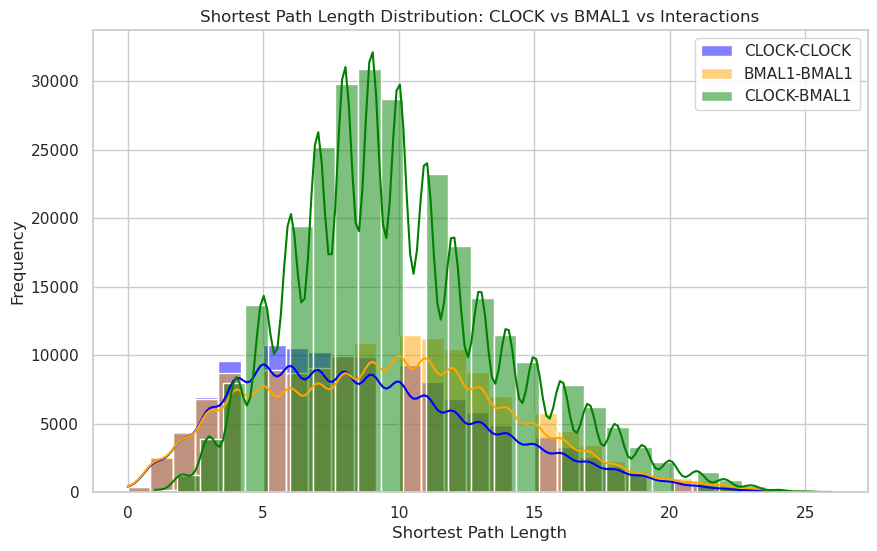

In [139]:
path_lengths = dict(nx.all_pairs_shortest_path_length(G))

# Separate lengths by CLOCK and BMAL1 pairs
clock_lengths = []
bmal1_lengths = []
inter_lengths = []  # Between CLOCK and BMAL1

for source in path_lengths:
    for target, length in path_lengths[source].items():
        if source<354 and target<354:
            clock_lengths.append(length)
        elif source>=354 and target>=354:
            bmal1_lengths.append(length)
        else:
            inter_lengths.append(length)

# Plot the path length distributions
plt.figure(figsize=(10, 6))
sns.histplot(clock_lengths, color='blue', label='CLOCK-CLOCK', kde=True, bins=30)
sns.histplot(bmal1_lengths, color='orange', label='BMAL1-BMAL1', kde=True, bins=30)
sns.histplot(inter_lengths, color='green', label='CLOCK-BMAL1', kde=True, bins=30)

plt.title('Shortest Path Length Distribution: CLOCK vs BMAL1 vs Interactions')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

/home/ramanuja-simha/anaconda3/envs/protstructmultilayer/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


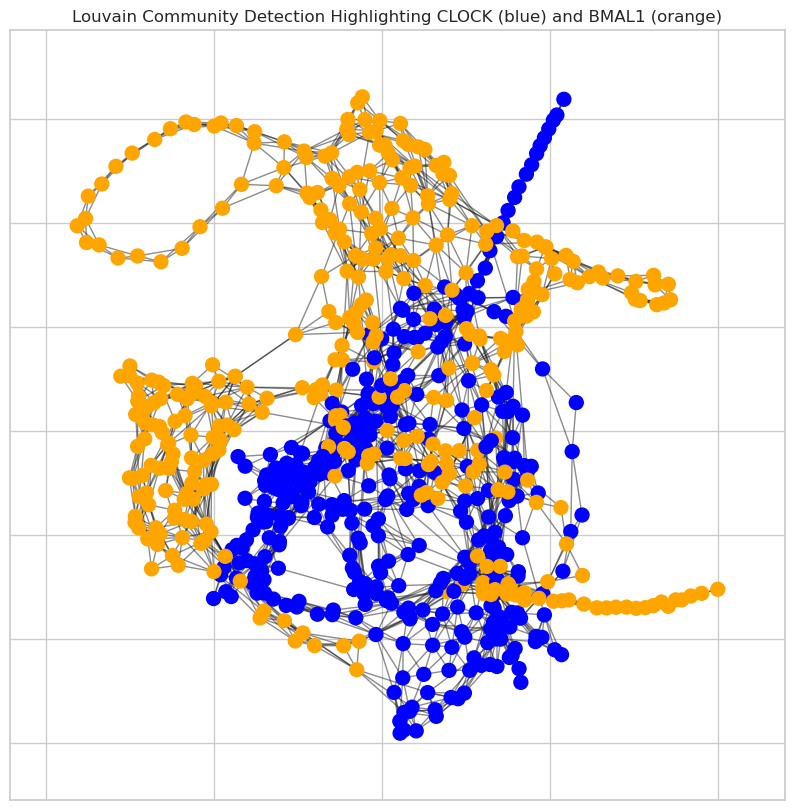

In [140]:
import community as community_louvain

# Perform Louvain community detection
partition = community_louvain.best_partition(G)

# Assign colors to CLOCK and BMAL1 nodes
colors = ['blue' if node<354 else 'orange' for node in G.nodes()]

# Plot the network with community detection highlighting CLOCK and BMAL1 nodes
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Layout for plotting
nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.RdYlBu, node_color=colors)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Louvain Community Detection Highlighting CLOCK (blue) and BMAL1 (orange)')
plt.show()

In [141]:
degree_assortativity = nx.degree_assortativity_coefficient(G)

# Optionally calculate assortativity within CLOCK and BMAL1 layers
clock_assortativity = nx.degree_assortativity_coefficient(G.subgraph([node for node in G if node<354]))
bmal1_assortativity = nx.degree_assortativity_coefficient(G.subgraph([node for node in G if node>=354]))

print(f"Overall Degree Assortativity: {degree_assortativity:.3f}")
print(f"CLOCK Assortativity: {clock_assortativity:.3f}")
print(f"BMAL1 Assortativity: {bmal1_assortativity:.3f}")

Overall Degree Assortativity: 0.464
CLOCK Assortativity: 0.450
BMAL1 Assortativity: 0.472


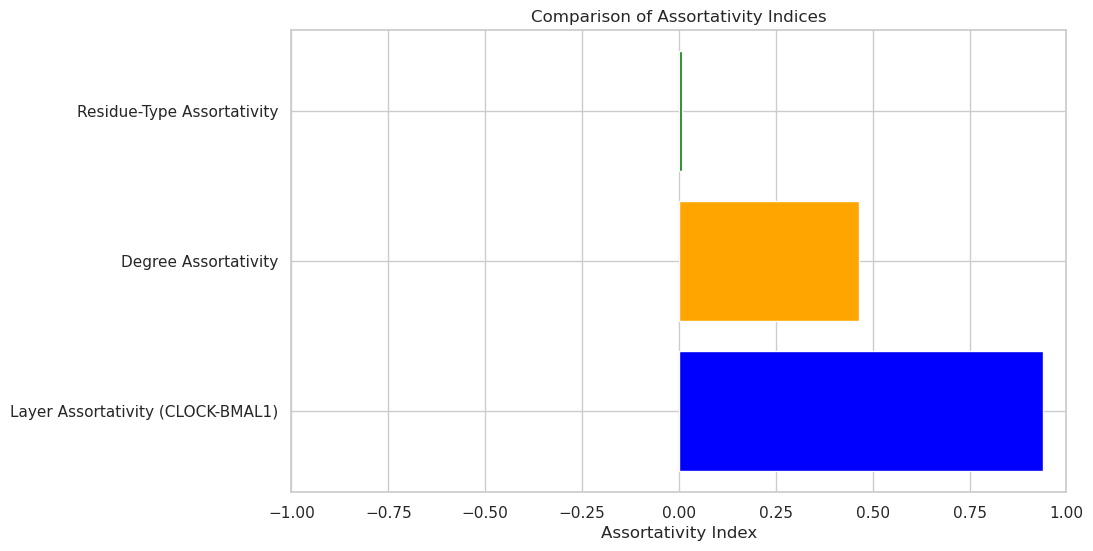

In [152]:
hydrophobic_residues = {'ALA', 'VAL', 'LEU', 'ILE', 'MET', 'PHE', 'TRP', 'PRO'}
polar_residues = {'SER', 'THR', 'ASN', 'GLN', 'TYR', 'CYS'}
acidic_residues = {'ASP', 'GLU'}
basic_residues = {'LYS', 'ARG', 'HIS'}
charged_residues = acidic_residues | basic_residues
hydrophilic_residues = polar_residues | charged_residues

for node in G.nodes():
    # print(node)
    resname = residueNames[node]
    if resname in hydrophobic_residues:
        G.nodes[node]['residue_type'] = "Hydrophobic"
    elif resname in polar_residues:
        G.nodes[node]['residue_type'] = "Polar"
    elif resname in acidic_residues:
        G.nodes[node]['residue_type'] = "Acidic"
    elif resname in basic_residues:
        G.nodes[node]['residue_type'] = "Basic"
    elif resname == 'HOH':
        G.nodes[node]['residue_type'] = "Water"
    else:
        G.nodes[node]['residue_type'] = "Unknown"
    
    if node<354:
        G.nodes[node]['layer'] = 'CLOCK'
    else:
        G.nodes[node]['layer'] = 'BMAL1'

# Calculate assortativity based on layers (attribute-based)
layer_assortativity = nx.attribute_assortativity_coefficient(G, 'layer')

# Calculate degree assortativity for cross-layer connections
degree_assortativity = nx.degree_assortativity_coefficient(G)

# Optionally, calculate residue-type assortativity if residue types are available as node attributes
# Assuming node['residue_type'] is defined
residue_type_assortativity = nx.attribute_assortativity_coefficient(G, 'residue_type')

# Plotting the different assortativity indices
assortativity_metrics = {
    'Layer Assortativity (CLOCK-BMAL1)': layer_assortativity,
    'Degree Assortativity': degree_assortativity,
    'Residue-Type Assortativity': residue_type_assortativity,
}

# Convert to lists for plotting
metric_names = list(assortativity_metrics.keys())
metric_values = list(assortativity_metrics.values())

# Plot the assortativity indices
plt.figure(figsize=(10, 6))
plt.barh(metric_names, metric_values, color=['blue', 'orange', 'green'])
plt.xlabel('Assortativity Index')
plt.title('Comparison of Assortativity Indices')
plt.xlim([-1, 1])  # Assortativity ranges from -1 to 1
plt.show()

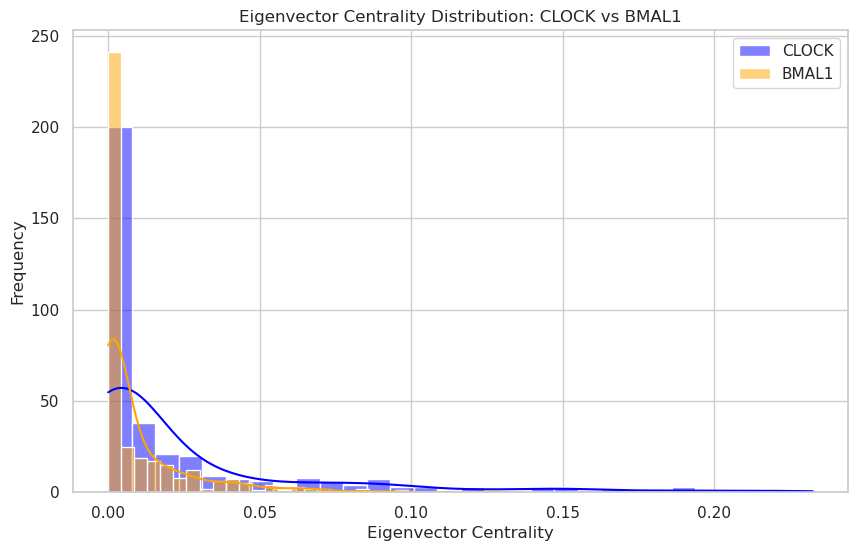

In [156]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6, weight='weight')

# Separate eigenvector centrality for CLOCK and BMAL1
clock_eigenvector = {node: ec for node, ec in eigenvector_centrality.items() if node<354}
bmal1_eigenvector = {node: ec for node, ec in eigenvector_centrality.items() if node>=354}

# Plot the eigenvector centrality for CLOCK and BMAL1
plt.figure(figsize=(10, 6))
sns.histplot(list(clock_eigenvector.values()), color='blue', label='CLOCK', kde=True, bins=30)
sns.histplot(list(bmal1_eigenvector.values()), color='orange', label='BMAL1', kde=True, bins=30)

plt.title('Eigenvector Centrality Distribution: CLOCK vs BMAL1')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [24]:
def normalize_scores(scores):
    """ Normalize the scores to the range [0, 1]. """
    min_score = np.min(scores)
    max_score = np.max(scores)
    return (scores - min_score) / (max_score - min_score) if max_score > min_score else scores

def localCentrality(A, p, maxIterations=1000):
    # A = A/np.sum(A, axis=0)
    n = A.shape[0]
    l = np.ones(n) / n
    unitNormal = np.copy(l)
    angle = float(0)
    for _ in range(maxIterations):
        lNew = (p*(A.dot(l))) + ((1-p)*unitNormal)
        angleNew = angle_between(l, lNew)
        if (angleNew==angle) or (angleNew==0):
            break
        l, angle = lNew, angleNew
    return(l)

def globalCentrality(A, C, p, maxIterations=1000):
    l = normalize_scores(localCentrality(A, p))
    n = A.shape[0]
    g = np.ones(n) / n
    unitNormal = np.copy(g)
    angle = float(0)
    for _ in range(maxIterations):
        gNew = (p*((A+C).dot(g) + C.dot(l))) + ((1-p)*unitNormal)
        angleNew = angle_between(g, gNew)
        if (angleNew==angle) or (angleNew==0):
            break
        g, angle = gNew, angleNew
    g = normalize_scores(g)
    return(g,l)

# A = [[0, 1, 1], [1, 0, 0], [1, 0, 0]]
# l = localCentrality(np.array(A), 0.9)
# print(l)
# l = local_centrality(np.array(A), 1, 0.9)
# print(l)

A, C = np.zeros(shape=(728, 728)), np.zeros(shape=(728, 728))
for (u, v) in chainAEdges+chainBEdges:
    A[u, v] = 1.
for (u, v) in chainABEdges:
    if (u<354 and v>=354) or (v<354 and u>=354):
        C[u, v] = 1.

def column_normalize(matrix):
    """Normalize the given matrix by its columns."""
    # Calculate the sum of each column
    column_sums = np.sum(matrix, axis=0)
    # Avoid division by zero by replacing zeros with ones
    column_sums[column_sums == 0] = 1
    # Normalize each column
    normalized_matrix = matrix / column_sums
    return normalized_matrix

ANorm = column_normalize(A)
CNorm = column_normalize(C)
g, l = globalCentrality(A, C, 0.9)

multicens_centrality = g
print(max(multicens_centrality))
# multicens_centrality = [value * 1e5 for value in multicens_centrality]

# Separate eigenvector centrality for CLOCK and BMAL1
clock_eigenvector = {node: multicens_centrality[node] for node in range(len(multicens_centrality)) if node<354}
bmal1_eigenvector = {node: multicens_centrality[node] for node in range(len(multicens_centrality)) if node>=354}

# Plot the eigenvector centrality for CLOCK and BMAL1
plt.figure(figsize=(10, 6))
sns.histplot(list(clock_eigenvector.values()), color='blue', label='CLOCK', kde=True, bins=30)
sns.histplot(list(bmal1_eigenvector.values()), color='orange', label='BMAL1', kde=True, bins=30)
# plt.xscale('log')
# from matplotlib.ticker import FormatStrFormatter
# plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
plt.title('Multicens Centrality Distribution: CLOCK vs BMAL1')
plt.xlabel('Multicens Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.show()

NameError: name 'angle_between' is not defined

In [168]:
import numpy as np

def initialize_graph(layers, interlayer_edges):
    """ Initializes a multilayer graph given the adjacency lists for each layer and interlayer edges. """
    total_nodes = 0
    graph = {}

    # Create a graph structure for each layer
    for layer, layer_info in layers.items():
        num_nodes = len(layer_info['edges'])
        graph[layer] = np.zeros((num_nodes, num_nodes))  # Adjacency matrix for the layer
        for (i, j) in layer_info['edges']:
            graph[layer][i][j] = 1  # Add edges based on input

        # Update total_nodes to maintain separate indices
        total_nodes += num_nodes

    # Handle interlayer connections
    interlayer_edges_matrix = []
    for (layer_a, node_a, layer_b, node_b) in interlayer_edges:
        interlayer_edges_matrix.append((layer_a, node_a, layer_b, node_b))

    return graph, interlayer_edges_matrix

def random_walk(graph, interlayer_edges, start_node, num_steps=1000, d=0.85):
    """ Performs a random walk on the multilayer graph with interlayer teleportation. """
    # Flatten the node space to track node indices across layers
    scores = np.zeros(sum(len(layer['edges']) for layer in layers.values()))
    current_node = start_node
    
    for _ in range(num_steps):
        if np.random.rand() < d:  # Follow a random edge with probability d
            layer, node = current_node
            neighbors = np.nonzero(graph[layer][node])[0]
            if len(neighbors) > 0:
                current_node = (layer, np.random.choice(neighbors))
            else:
                current_node = (layer, node)  # Stay in place if no neighbors
        else:  # Teleport to a random node
            # Choose a random interlayer edge to teleport
            if interlayer_edges:
                layer_a, node_a, layer_b, node_b = interlayer_edges[np.random.randint(len(interlayer_edges))]
                current_node = (layer_b, node_b)  # Teleport to interlayer connection
            else:
                layer = np.random.choice(list(graph.keys()))
                node = np.random.randint(len(graph[layer]))
                current_node = (layer, node)
        
        # Update the scores for the current node
        layer_name, node_idx = current_node
        global_node_index = sum(len(layers[l]['edges']) for l in layers if l < layer_name) + node_idx
        scores[global_node_index] += 1
        
    return scores

def compute_pagerank(layers, interlayer_edges, num_steps=1000, d=0.85):
    """ Computes the PageRank-like scores for the multilayer graph. """
    graph, interlayer_edges_matrix = initialize_graph(layers, interlayer_edges)
    
    # Total number of nodes across all layers
    total_nodes = sum(len(layer['edges']) for layer in layers.values())
    scores = np.zeros(total_nodes, dtype=float)  # Ensure scores are float for precision
    
    # Perform random walks starting from each node in each layer
    for layer_name in layers:
        for start_node in range(len(layers[layer_name]['edges'])):
            current_node = (layer_name, start_node)
            scores += random_walk(graph, interlayer_edges_matrix, current_node, num_steps, d)
    
    return scores / np.sum(scores)  # Normalize scores

# Example usage
layers = {
    'Layer1': {
        'edges': [(0, 1), (1, 2)],  # Edges in Layer 1
    },
    'Layer2': {
        'edges': [(0, 1)],           # Edges in Layer 2
    }
}

interlayer_edges = [('Layer1', 1, 'Layer2', 0)]  # Interlayer connections

pagerank_scores = compute_pagerank(layers, interlayer_edges, num_steps=10000, d=0.85)
print("PageRank Scores:", pagerank_scores)

IndexError: index 2 is out of bounds for axis 0 with size 2

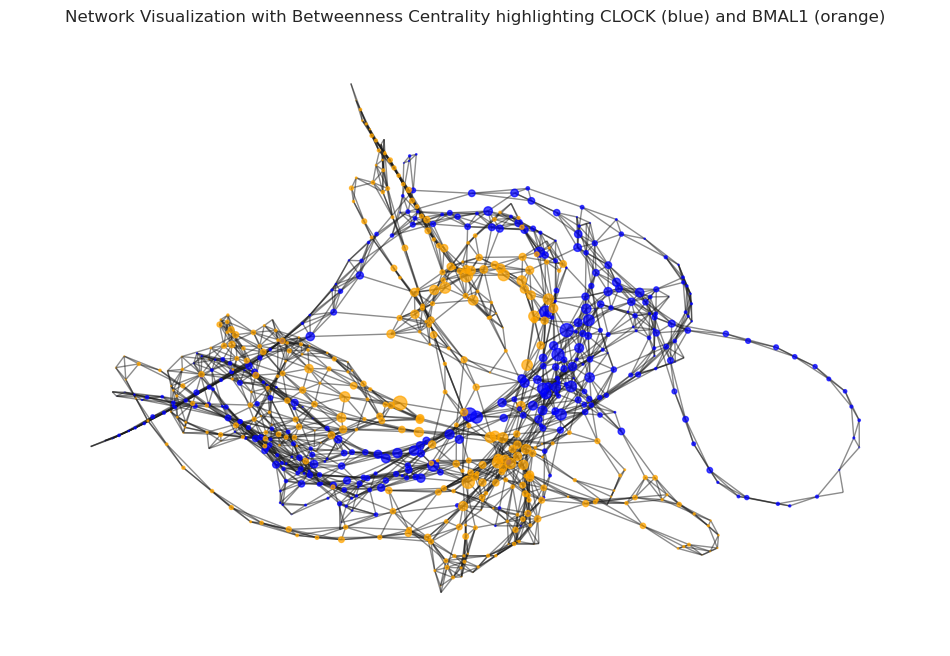

In [174]:
import matplotlib.pyplot as plt
import networkx as nx

# Create or load your graph G
# G = nx.Graph()

# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(G)

node_colors = ['blue' if node<354 else 'orange' for node in G.nodes()]
# Draw the network with node sizes based on betweenness centrality
node_sizes = [v * 1000 for v in betweenness.values()]  # Scale for visibility

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes and edges
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)

# Add labels if needed
# nx.draw_networkx_labels(G, pos)

plt.title('Network Visualization with Betweenness Centrality highlighting CLOCK (blue) and BMAL1 (orange)')
plt.axis('off')
plt.show()

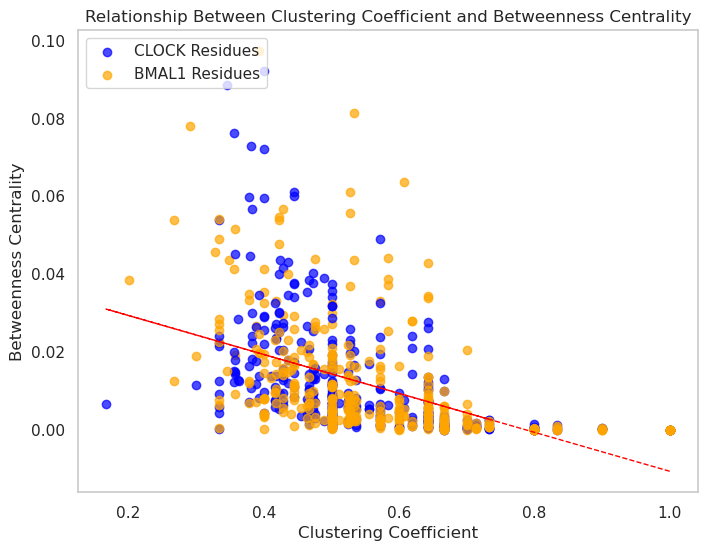

In [175]:
# Calculate clustering coefficients
clustering_coeffs = nx.clustering(G)

# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(G)

clustering_values = np.array(list(clustering_coeffs.values()))
betweenness_values = np.array(list(betweenness.values()))

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Highlight CLOCK and BMAL1 residues with different colors
for node in G.nodes():
    if node<354:
        plt.scatter(clustering_coeffs[node], betweenness[node], color='blue', label='CLOCK Residues' if 'CLOCK Residues' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)
    else:
        plt.scatter(clustering_coeffs[node], betweenness[node], color='orange', label='BMAL1 Residues' if 'BMAL1 Residues' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)

# Add labels and title
plt.xlabel('Clustering Coefficient')
plt.ylabel('Betweenness Centrality')
plt.title('Relationship Between Clustering Coefficient and Betweenness Centrality')

# Optionally add a line of best fit
m, b = np.polyfit(clustering_values, betweenness_values, 1)  # Linear fit
plt.plot(clustering_values, m*clustering_values + b, color='red', linestyle='--', linewidth=1)

plt.grid()
plt.legend(loc='upper left')
plt.show()

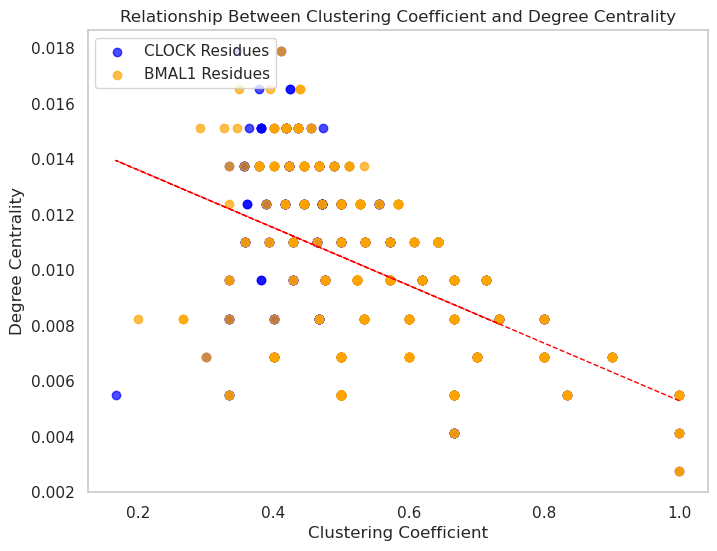

In [176]:
clustering_coeffs = nx.clustering(G)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Prepare data for plotting
clustering_values = np.array(list(clustering_coeffs.values()))
degree_values = np.array(list(degree_centrality.values()))

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Highlight CLOCK and BMAL1 residues with different colors
for node in G.nodes():
    if node<354:
        plt.scatter(clustering_coeffs[node], degree_centrality[node], color='blue', label='CLOCK Residues' if 'CLOCK Residues' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)
    else:
        plt.scatter(clustering_coeffs[node], degree_centrality[node], color='orange', label='BMAL1 Residues' if 'BMAL1 Residues' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)

# Add labels and title
plt.xlabel('Clustering Coefficient')
plt.ylabel('Degree Centrality')
plt.title('Relationship Between Clustering Coefficient and Degree Centrality')

# Optionally add a line of best fit
m, b = np.polyfit(clustering_values, degree_values, 1)  # Linear fit
plt.plot(clustering_values, m*clustering_values + b, color='red', linestyle='--', linewidth=1)

plt.grid()
plt.legend(loc='upper left')
plt.show()

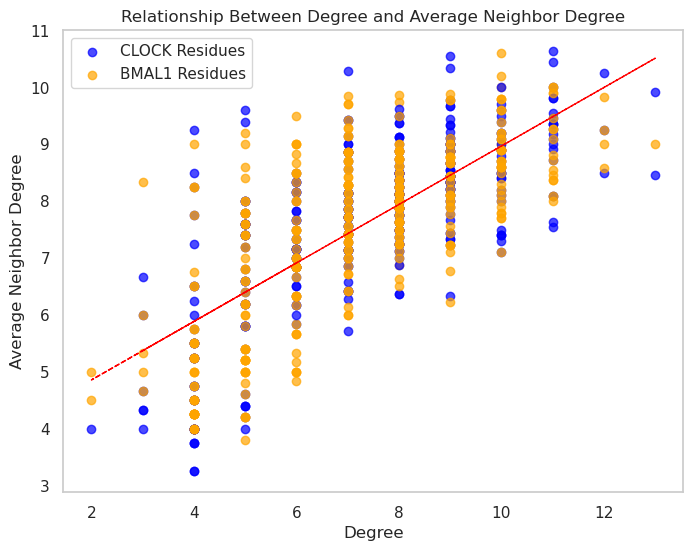

In [177]:
# Calculate degrees and neighbor degrees
degrees = dict(G.degree())
neighbor_degrees = {node: np.mean([degrees[neighbor] for neighbor in G.neighbors(node)]) for node in G.nodes()}

# Prepare data for plotting
degree_values = np.array(list(degrees.values()))
neighbor_degree_values = np.array(list(neighbor_degrees.values()))

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Highlight CLOCK and BMAL1 residues with different colors
for node in G.nodes():
    if node<354:
        plt.scatter(degrees[node], neighbor_degrees[node], color='blue', label='CLOCK Residues' if 'CLOCK Residues' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)
    else:
        plt.scatter(degrees[node], neighbor_degrees[node], color='orange', label='BMAL1 Residues' if 'BMAL1 Residues' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)

# Add labels and title
plt.xlabel('Degree')
plt.ylabel('Average Neighbor Degree')
plt.title('Relationship Between Degree and Average Neighbor Degree')

# Optionally add a line of best fit
m, b = np.polyfit(degree_values, neighbor_degree_values, 1)  # Linear fit
plt.plot(degree_values, m * degree_values + b, color='red', linestyle='--', linewidth=1)

plt.grid()
plt.legend(loc='upper left')
plt.show()



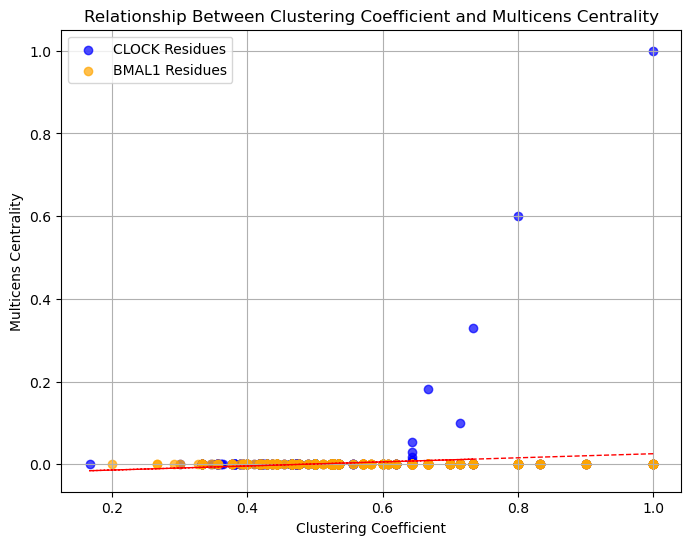

In [28]:
clustering_coeffs = nx.clustering(G)

# Calculate degree centrality
multicens_centrality = list(g)

# Prepare data for plotting
clustering_values = np.array(list(clustering_coeffs.values()))
multicens_values = np.array(list(multicens_centrality))

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Highlight CLOCK and BMAL1 residues with different colors
for node in G.nodes():
    if node<354:
        plt.scatter(clustering_coeffs[node], multicens_centrality[node], color='blue', label='CLOCK Residues' if 'CLOCK Residues' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)
    else:
        plt.scatter(clustering_coeffs[node], multicens_centrality[node], color='orange', label='BMAL1 Residues' if 'BMAL1 Residues' not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.7)

# Add labels and title
plt.xlabel('Clustering Coefficient')
plt.ylabel('Multicens Centrality')
plt.title('Relationship Between Clustering Coefficient and Multicens Centrality')

# Optionally add a line of best fit
m, b = np.polyfit(clustering_values, multicens_values, 1)  # Linear fit
plt.plot(clustering_values, m*clustering_values + b, color='red', linestyle='--', linewidth=1)

plt.grid()
plt.legend(loc='upper left')
plt.show()

In [6]:
# Calculate Jaccard similarity for all pairs of nodes
jaccard_coeffs = nx.jaccard_coefficient(G)
# print(jaccard_coeffs)
# Prepare lists to hold values for plotting
jaccard_values = []
connection_probabilities = []
print("YES")
clockIntra = []
bmal1Intra = []
clockBmal1Inter = []
# Calculate Jaccard similarity and connection probability for each edge
for u, v, p in jaccard_coeffs:
    # Jaccard similarity value
    # jaccard_values.append(p)
    
    # Calculate connection probability based on degree of node u
    degree_u = G.degree(u)
    connection_probability = 1 / degree_u if degree_u > 0 else 0
    # connection_probabilities.append(connection_probability)
    if u<354 and v<354:
        clockIntra.append([p, connection_probability])
    elif u>=354 and v>=354:
        bmal1Intra.append([p, connection_probability])
    else:
        clockBmal1Inter.append([p, connection_probability])

# Convert to numpy arrays for easier manipulation
# jaccard_values = np.array(jaccard_values)
# connection_probabilities = np.array(connection_probabilities)

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter for CLOCK and BMAL1 residues
# plt.scatter(jaccard_values, connection_probabilities, color='grey', alpha=0.5)

# Highlight CLOCK and BMAL1 residues
for x, y in clockIntra:
    plt.scatter(x, y, color='blue', label='CLOCK-CLOCK', alpha=0.7)
for x, y in bmal1Intra:
    plt.scatter(x, y, color='orange', label='BMAL1-BMAL1', alpha=0.7)
for x, y in clockBmal1Inter:
    plt.scatter(x, y, color='green', label='CLOCK-BMAL1', alpha=0.7)

# Set axis labels and title
plt.xlabel('Jaccard Similarity')
plt.ylabel('Connection Probability (1/degree of u)')
plt.title('Jaccard Similarity vs. Connection Probability with CLOCK and BMAL1 Highlighted')

plt.grid()
plt.legend(loc='upper left')
plt.show()

YES


ValueError: Image size of 716x5487286 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x600 with 1 Axes>

In [1]:
print("YES")

YES
